In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from unetRGB import *

# Step 1: Load the trained model
myunet = myUnet()
model = myunet.get_unet()
model.load_weights('unet.keras')

conv1 shape: (None, 512, 512, 64)
conv1 shape: (None, 512, 512, 64)
pool1 shape: (None, 256, 256, 64)
conv2 shape: (None, 256, 256, 128)
conv2 shape: (None, 256, 256, 128)
pool2 shape: (None, 128, 128, 128)
conv3 shape: (None, 128, 128, 256)
conv3 shape: (None, 128, 128, 256)
pool3 shape: (None, 64, 64, 256)
<KerasTensor shape=(None, 64, 64, 512), dtype=float32, sparse=False, name=keras_tensor_252>
<KerasTensor shape=(None, 64, 64, 1024), dtype=float32, sparse=False, name=keras_tensor_253>
<KerasTensor shape=(None, 64, 64, 512), dtype=float32, sparse=False, name=keras_tensor_254>
<KerasTensor shape=(None, 64, 64, 512), dtype=float32, sparse=False, name=keras_tensor_255>
<KerasTensor shape=(None, 128, 128, 256), dtype=float32, sparse=False, name=keras_tensor_257>
<KerasTensor shape=(None, 128, 128, 512), dtype=float32, sparse=False, name=keras_tensor_258>
<KerasTensor shape=(None, 128, 128, 256), dtype=float32, sparse=False, name=keras_tensor_259>
<KerasTensor shape=(None, 128, 128, 256

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


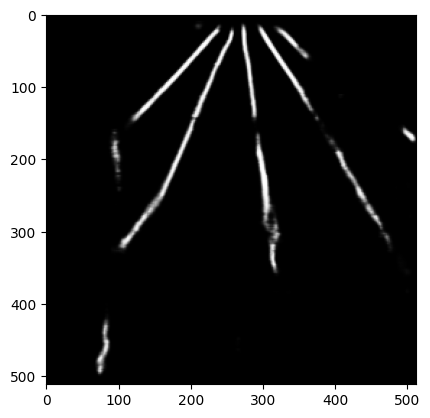

In [50]:
# Step 2: Load and preprocess the image
# Example: Load an image from file
image_path = 'data/test/image/0.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Use IMREAD_COLOR if it's a color image

# Resize the image to match the input size expected by your U-Net (e.g., 256x256)
img_resized = cv2.resize(img, (512, 512))

# Normalize the image (same preprocessing as used during training)
img_normalized = img_resized / 255.0  # If you normalized the training data

# Expand the dimensions to match the model input shape (batch_size, height, width, channels)
img_input = np.expand_dims(img_normalized, axis=3)  # Add channel dimension
img_input = np.expand_dims(img_input, axis=0)  # Add batch dimension

# Step 3: Run inference
prediction = model.predict(img_input)

# Step 4: Postprocess and visualize the result
# For binary segmentation (thresholding)
prediction = prediction.squeeze()  # Remove batch and channel dimensions if it's single-channel output
plt.imshow(prediction, cmap='gray')
prediction = (prediction > 0.9).astype(np.uint8)  # Apply threshold to get binary mask

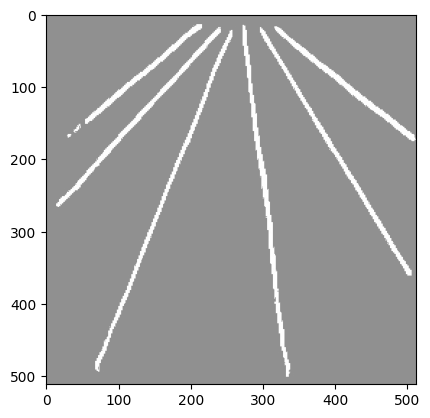

In [57]:
# Example: Load an image from file
image_path_result = 'results/0.jpg'
img_result = cv2.imread(image_path_result, cv2.IMREAD_COLOR) 

image_path_label = 'test/label/0.jpg'
img_label = cv2.imread(image_path_result, cv2.IMREAD_COLOR) 

# Create an RGB version with the red channel set to the image, others to 0
prediction_red = np.zeros((prediction.shape[0], prediction.shape[1], 3))
prediction_red[..., 0] = prediction  # Set red channel

# plt.imshow(prediction, cmap='jet', alpha=0.5)

plt.imshow(img_result, cmap='gray', alpha=0.25)
#plt.imshow(img_normalized, cmap='gray', alpha=0.75)
plt.imshow(img_label, cmap='gray', alpha=0.25)
# plt.imshow(prediction_red, alpha=0.25)

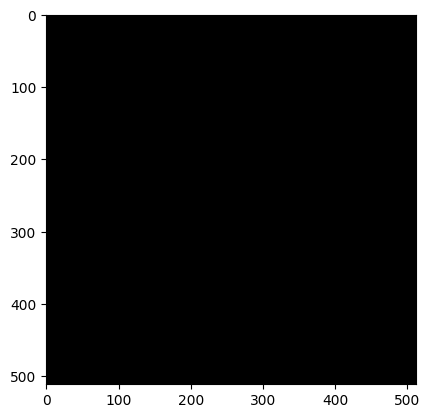

In [56]:
xor_image = cv2.bitwise_xor(img_result, img_label)
plt.imshow(xor_image)
#this shows the difference between prediction and test image is 0% or IoU is 100%. This cannot be right. 

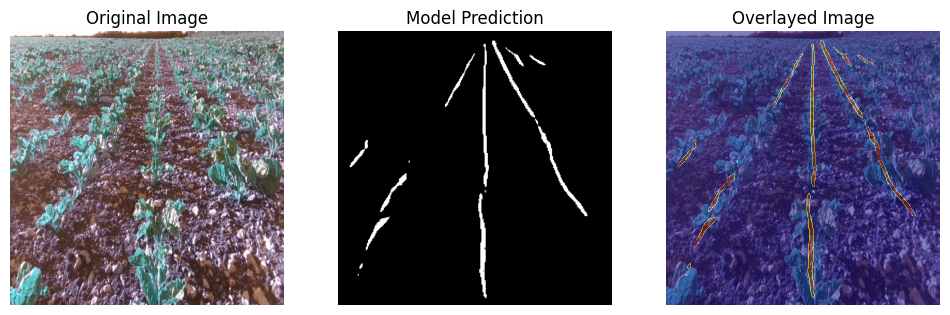

In [7]:

# Visualize the result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_resized, cmap='gray')
plt.axis('off')

# Prediction (Segmented Output)
plt.subplot(1, 3, 2)
plt.title("Model Prediction")
plt.imshow(prediction, cmap='gray')
plt.axis('off')

# Overlay
plt.subplot(1, 3, 3)
plt.title("Overlayed Image")
plt.imshow(img_resized, cmap='gray')  # Display the original image
plt.imshow(prediction, cmap='jet', alpha=0.5)  # 50% transparency overlay of the prediction
plt.axis('off')

plt.show()


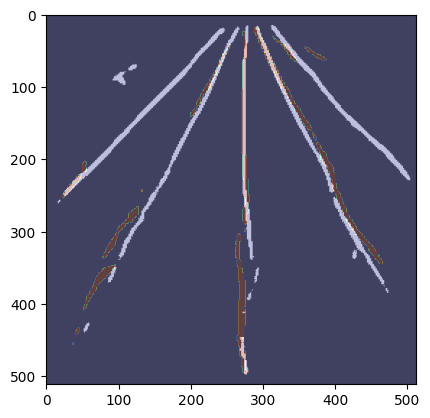